## Gather

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import requests
import json
import tweepy
from timeit import default_timer as timer
import operator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read twitter_archive_enhanced.csv as pandas DataFrame
tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# download image_prediction.tsv programmatically from udacity server
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# create a text file to hold the binary's content and save it in the working dicrectory
with open('image_prediction.txt', mode ='wb') as f:
    f.write(response.content)

# read image_prediction.txt as pandas DataFrame
image_prediction = pd.read_csv('image_prediction.txt', sep = '\t')

In [4]:
# create an API object
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit  = True, wait_on_rate_limit_notify = True)

In [5]:
# create pandas series of the tweet ids from tweets DataFrame
tweet_ids = tweets.tweet_id

# query the JSON data from twitter's API using tweet_ids and save them in a text file, tweet_json.txt
count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', mode = 'w') as f:
    for i in tweet_ids:
        count +=1
        print(str(count) + ': ' + str(i))
        try:
            tweet = api.get_status(i, tweet_mode = 'extended')
            print('success')
            json.dump(tweet._json, f)
            f.write('\n')
        except tweepy.TweepError as e:
            print('fail')
            fails_dict[i] = e
            pass
end = timer ()
print(fails_dict)
print()
print('time spent = ', end-start)

1: 892420643555336193
success
2: 892177421306343426
success
3: 891815181378084864
success
4: 891689557279858688
success
5: 891327558926688256
success
6: 891087950875897856
success
7: 890971913173991426
success
8: 890729181411237888
success
9: 890609185150312448
success
10: 890240255349198849
success
11: 890006608113172480
success
12: 889880896479866881
success
13: 889665388333682689
success
14: 889638837579907072
success
15: 889531135344209921
success
16: 889278841981685760
success
17: 888917238123831296
success
18: 888804989199671297
success
19: 888554962724278272
success
20: 888202515573088257
fail
21: 888078434458587136
success
22: 887705289381826560
success
23: 887517139158093824
success
24: 887473957103951883
success
25: 887343217045368832
success
26: 887101392804085760
success
27: 886983233522544640
success
28: 886736880519319552
success
29: 886680336477933568
success
30: 886366144734445568
success
31: 886267009285017600
success
32: 886258384151887873
success
33: 8860541600590725

fail
262: 842846295480000512
success
263: 842765311967449089
success
264: 842535590457499648
success
265: 842163532590374912
success
266: 842115215311396866
success
267: 841833993020538882
success
268: 841680585030541313
success
269: 841439858740625411
success
270: 841320156043304961
success
271: 841314665196081154
success
272: 841077006473256960
success
273: 840761248237133825
success
274: 840728873075638272
success
275: 840698636975636481
success
276: 840696689258311684
success
277: 840632337062862849
success
278: 840370681858686976
success
279: 840268004936019968
success
280: 839990271299457024
success
281: 839549326359670784
success
282: 839290600511926273
success
283: 839239871831150596
success
284: 838952994649550848
success
285: 838921590096166913
success
286: 838916489579200512
success
287: 838831947270979586
success
288: 838561493054533637
success
289: 838476387338051585
success
290: 838201503651401729
success
291: 838150277551247360
success
292: 838085839343206401
success
293

success
519: 810657578271330305
success
520: 810284430598270976
success
521: 810254108431155201
success
522: 809920764300447744
success
523: 809808892968534016
success
524: 809448704142938112
success
525: 809220051211603969
success
526: 809084759137812480
success
527: 808838249661788160
success
528: 808733504066486276
success
529: 808501579447930884
success
530: 808344865868283904
success
531: 808134635716833280
success
532: 808106460588765185
success
533: 808001312164028416
success
534: 807621403335917568
success
535: 807106840509214720
success
536: 807059379405148160
success
537: 807010152071229440
success
538: 806629075125202948
success
539: 806620845233815552
success
540: 806576416489959424
success
541: 806542213899489280
success
542: 806242860592926720
success
543: 806219024703037440
success
544: 805958939288408065
success
545: 805932879469572096
success
546: 805826884734976000
success
547: 805823200554876929
success
548: 805520635690676224
success
549: 805487436403003392
success


success
776: 776201521193218049
success
777: 776113305656188928
success
778: 776088319444877312
success
779: 775898661951791106
success
780: 775842724423557120
success
781: 775733305207554048
success
782: 775729183532220416
success
783: 775364825476165632
success
784: 775350846108426240
success
785: 775096608509886464
fail
786: 775085132600442880
success
787: 774757898236878852
success
788: 774639387460112384
success
789: 774314403806253056
success
790: 773985732834758656
success
791: 773922284943896577
success
792: 773704687002451968
success
793: 773670353721753600
success
794: 773547596996571136
success
795: 773336787167145985
success
796: 773308824254029826
success
797: 773247561583001600
success
798: 773191612633579521
success
799: 772877495989305348
success
800: 772826264096874500
success
801: 772615324260794368
success
802: 772581559778025472
success
803: 772193107915964416
success
804: 772152991789019136
success
805: 772117678702071809
success
806: 772114945936949249
success
807

Rate limit reached. Sleeping for: 664


success
901: 758740312047005698
success
902: 758474966123810816
success
903: 758467244762497024
success
904: 758405701903519748
success
905: 758355060040593408
success
906: 758099635764359168
success
907: 758041019896193024
success
908: 757741869644341248
success
909: 757729163776290825
success
910: 757725642876129280
success
911: 757611664640446465
success
912: 757597904299253760
success
913: 757596066325864448
success
914: 757400162377592832
success
915: 757393109802180609
success
916: 757354760399941633
success
917: 756998049151549440
success
918: 756939218950160384
success
919: 756651752796094464
success
920: 756526248105566208
success
921: 756303284449767430
success
922: 756288534030475264
success
923: 756275833623502848
success
924: 755955933503782912
success
925: 755206590534418437
success
926: 755110668769038337
success
927: 754874841593970688
success
928: 754856583969079297
success
929: 754747087846248448
success
930: 754482103782404096
success
931: 754449512966619136
success


success
1153: 725786712245440512
success
1154: 725729321944506368
success
1155: 725458796924002305
success
1156: 724983749226668032
success
1157: 724771698126512129
success
1158: 724405726123311104
success
1159: 724049859469295616
success
1160: 724046343203856385
success
1161: 724004602748780546
success
1162: 723912936180330496
success
1163: 723688335806480385
success
1164: 723673163800948736
success
1165: 723179728551723008
success
1166: 722974582966214656
success
1167: 722613351520608256
success
1168: 721503162398597120
success
1169: 721001180231503872
success
1170: 720785406564900865
success
1171: 720775346191278080
success
1172: 720415127506415616
success
1173: 720389942216527872
success
1174: 720340705894408192
success
1175: 720059472081784833
success
1176: 720043174954147842
success
1177: 719991154352222208
success
1178: 719704490224398336
success
1179: 719551379208073216
success
1180: 719367763014393856
success
1181: 719339463458033665
success
1182: 719332531645071360
success
11

success
1402: 699434518667751424
success
1403: 699423671849451520
success
1404: 699413908797464576
success
1405: 699370870310113280
success
1406: 699323444782047232
success
1407: 699088579889332224
success
1408: 699079609774645248
success
1409: 699072405256409088
success
1410: 699060279947165696
success
1411: 699036661657767936
success
1412: 698989035503689728
success
1413: 698953797952008193
success
1414: 698907974262222848
success
1415: 698710712454139905
success
1416: 698703483621523456
success
1417: 698635131305795584
success
1418: 698549713696649216
success
1419: 698355670425473025
success
1420: 698342080612007937
success
1421: 698262614669991936
success
1422: 698195409219559425
success
1423: 698178924120031232
success
1424: 697995514407682048
success
1425: 697990423684476929
success
1426: 697943111201378304
success
1427: 697881462549430272
success
1428: 697630435728322560
success
1429: 697616773278015490
success
1430: 697596423848730625
success
1431: 697575480820686848
success
14

success
1651: 683515932363329536
success
1652: 683498322573824003
success
1653: 683481228088049664
success
1654: 683462770029932544
success
1655: 683449695444799489
success
1656: 683391852557561860
success
1657: 683357973142474752
success
1658: 683142553609318400
success
1659: 683111407806746624
success
1660: 683098815881154561
success
1661: 683078886620553216
success
1662: 683030066213818368
success
1663: 682962037429899265
success
1664: 682808988178739200
success
1665: 682788441537560576
success
1666: 682750546109968385
success
1667: 682697186228989953
success
1668: 682662431982772225
success
1669: 682638830361513985
success
1670: 682429480204398592
success
1671: 682406705142087680
success
1672: 682393905736888321
success
1673: 682389078323662849
success
1674: 682303737705140231
success
1675: 682259524040966145
success
1676: 682242692827447297
success
1677: 682088079302213632
success
1678: 682059653698686977
success
1679: 682047327939461121
success
1680: 682032003584274432
success
16

Rate limit reached. Sleeping for: 661


success
1802: 676957860086095872
success
1803: 676949632774234114
success
1804: 676948236477857792
success
1805: 676946864479084545
success
1806: 676942428000112642
success
1807: 676936541936185344
success
1808: 676916996760600576
success
1809: 676897532954456065
success
1810: 676864501615042560
success
1811: 676821958043033607
success
1812: 676819651066732545
success
1813: 676811746707918848
success
1814: 676776431406465024
success
1815: 676617503762681856
success
1816: 676613908052996102
success
1817: 676606785097199616
success
1818: 676603393314578432
success
1819: 676593408224403456
success
1820: 676590572941893632
success
1821: 676588346097852417
success
1822: 676582956622721024
success
1823: 676575501977128964
success
1824: 676533798876651520
success
1825: 676496375194980353
success
1826: 676470639084101634
success
1827: 676440007570247681
success
1828: 676430933382295552
success
1829: 676263575653122048
success
1830: 676237365392908289
success
1831: 676219687039057920
success
18

success
2051: 671497587707535361
success
2052: 671488513339211776
success
2053: 671486386088865792
success
2054: 671485057807351808
success
2055: 671390180817915904
success
2056: 671362598324076544
success
2057: 671357843010908160
success
2058: 671355857343524864
success
2059: 671347597085433856
success
2060: 671186162933985280
success
2061: 671182547775299584
success
2062: 671166507850801152
success
2063: 671163268581498880
success
2064: 671159727754231808
success
2065: 671154572044468225
success
2066: 671151324042559489
success
2067: 671147085991960577
success
2068: 671141549288370177
success
2069: 671138694582165504
success
2070: 671134062904504320
success
2071: 671122204919246848
success
2072: 671115716440031232
success
2073: 671109016219725825
success
2074: 670995969505435648
success
2075: 670842764863651840
success
2076: 670840546554966016
success
2077: 670838202509447168
success
2078: 670833812859932673
success
2079: 670832455012716544
success
2080: 670826280409919488
success
20

success
2300: 667065535570550784
success
2301: 667062181243039745
success
2302: 667044094246576128
success
2303: 667012601033924608
success
2304: 666996132027977728
success
2305: 666983947667116034
success
2306: 666837028449972224
success
2307: 666835007768551424
success
2308: 666826780179869698
success
2309: 666817836334096384
success
2310: 666804364988780544
success
2311: 666786068205871104
success
2312: 666781792255496192
success
2313: 666776908487630848
success
2314: 666739327293083650
success
2315: 666701168228331520
success
2316: 666691418707132416
success
2317: 666649482315059201
success
2318: 666644823164719104
success
2319: 666454714377183233
success
2320: 666447344410484738
success
2321: 666437273139982337
success
2322: 666435652385423360
success
2323: 666430724426358785
success
2324: 666428276349472768
success
2325: 666421158376562688
success
2326: 666418789513326592
success
2327: 666411507551481857
success
2328: 666407126856765440
success
2329: 666396247373291520
success
23

In [6]:
# read tweet_json.txt as pandas DataFrame
tweet_json = pd.read_csv('tweet_json.txt', sep ='\n', header = None)

## Assess
##### `tweets` table

In [7]:
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
# check the number of unique values of each name
tweets.name.value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Tucker             10
Penny              10
Lola               10
Bo                  9
Winston             9
Sadie               8
the                 8
Daisy               7
Buddy               7
Toby                7
an                  7
Bailey              7
Rusty               6
Dave                6
Stanley             6
Scout               6
Leo                 6
Oscar               6
Milo                6
Jack                6
Bella               6
Koda                6
Jax                 6
Louis               5
                 ... 
Cermet              1
Strider             1
Mabel               1
Rodney              1
Emma                1
Buckley             1
Katie               1
Rhino               1
light               1
Caryl               1
Timber              1
Tater               1
Ike                 1
Shooter             1
Aja       

In [10]:
def view_text(df, col_in_q, operator, value):
    """ Returns the count, index, obs in question, and related obs from text column """
    count = 1
    idx = df[operator(df[col_in_q], value)].index
    for i in idx:
        print(count,'-', i,'-', df[col_in_q][i],'-', df.text[i])
        count += 1
    return

In [11]:
# view the obs of text column where the dog name is "a" by calling view_text function for better visual assessment 
view_text(tweets, 'name', operator.eq, 'a')

1 - 56 - a - Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
2 - 649 - a - Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
3 - 801 - a - Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
4 - 1002 - a - This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
5 - 1004 - a - Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
6 - 1017 - a - This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
7 - 1049 - a - This is a very rare Great Alaskan Bush Pupper. Hard to stum

**Note**: After visually assessing the text lines, I found that names preceded with the word "named" have an "a" name. Let's find all the names in `name` column where the name in `text` column were preceded by the word "named". The next step is to query those names

In [12]:
def view_name (df):
    """ returns the names in name column where the name is preceded by 'named' in the text column"""
    idx = df[df.text.str.contains('named\s[A-Za-z*.]')].index
    return df.loc[idx].name

In [13]:
# call view_name
view_name(tweets)

603     None
1853       a
1955       a
2034       a
2066       a
2116       a
2125       a
2128       a
2146       a
2161       a
2166    None
2191       a
2204      an
2218       a
2227    None
2235       a
2249       a
2255       a
2264       a
2269    None
2273       a
2304       a
2311       a
2314       a
Name: name, dtype: object

In [14]:
# find the number of unique values in the rating_numerator
tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
# view the text column obs where rating_numerator is > 20 by calling view_text function for better visual assessment
view_text(tweets, 'rating_numerator', operator.gt, 20)

1 - 188 - 420 - @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
2 - 189 - 666 - @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
3 - 290 - 182 - @markhoppus 182/10
4 - 313 - 960 - @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
5 - 340 - 75 - RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
6 - 433 - 84 - The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
7 - 516 - 24 - Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
8 - 695 - 75 - This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS

In [16]:
# view the text column obs where rating_numerator is < 10 by calling view_text function for better visual assessment
view_text(tweets, 'rating_numerator', operator.lt, 10)

1 - 45 - 5 - This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
2 - 229 - 6 - This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
3 - 315 - 0 - When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
4 - 387 - 7 - I was going to do 007/10, but the joke wasn't worth the &lt;10 rating
5 - 462 - 7 - RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…
6 - 485 - 9 - RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…
7 - 599 - 8 - RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 http

283 - 1998 - 7 - Meet Darby. He's a Fiscal Tutankhamen Waxbeard. Really likes steak. 7/10 https://t.co/rSndxTL0Ap
284 - 2003 - 8 - This is Buddy. He's photogenic af. Loves to sexily exit pond. Very striped. Comes with shield. 8/10 would pet well https://t.co/mYhQvAdV4f
285 - 2008 - 8 - Mighty rare dogs here. Long smooth necks. Great knees. Travel in squads. 1 out of every 14 is massive. 8/10 for all https://t.co/PoMKKnKpRd
286 - 2012 - 7 - This is Ridley. He doesn't know how to couch. 7/10 https://t.co/UHJE0UgMf7
287 - 2013 - 5 - Exotic underwater dog here. Very shy. Wont return tennis balls I toss him. Never been petted. 5/10 I bet he's soft https://t.co/WH7Nzc5IBA
288 - 2014 - 9 - This is Cal. He's a Swedish Geriatric Cheddar. Upset because the pope is laughing at his eyebrows. 9/10 https://t.co/EW4MsOrF5O
289 - 2015 - 9 - This is Opal. He's a Royal John Coctostan. Ready for transport. Basically indestructible. 9/10 good pupper https://t.co/yRBQF9OS7D
290 - 2017 - 8 - This is Bubba. 

In [17]:
# find the number of unique values of the rating_denominator
tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
# view the text column obs where rating_denominator is < 10 by calling view_text function for better visual assessment
view_text(tweets, 'rating_denominator', operator.lt, 10)

1 - 313 - 0 - @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
2 - 516 - 7 - Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
3 - 2335 - 2 - This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [19]:
# check the rating_numerator for tweets at 313, 516, 2335 indices
tweets.iloc[[313, 516, 2335]].rating_numerator

313     960
516      24
2335      1
Name: rating_numerator, dtype: int64

In [20]:
tweets.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
tweets.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [22]:
tweets.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:
tweets.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [24]:
# check for duplicated rows
tweets[tweets.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### `image_prediction` table

In [25]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# find if there is duplicate tweet_id
image_prediction.tweet_id.duplicated().all()

False

##### `tweet_json` table

In [28]:
tweet_json.head()

,0
0,"{""created_at"": ""Tue Aug 01 16:23:56 +0000 2017..."
1,"{""created_at"": ""Tue Aug 01 00:17:27 +0000 2017..."
2,"{""created_at"": ""Mon Jul 31 00:18:03 +0000 2017..."
3,"{""created_at"": ""Sun Jul 30 15:58:51 +0000 2017..."
4,"{""created_at"": ""Sat Jul 29 16:00:24 +0000 2017..."


In [29]:
# check out the first row of tweet_json DataFrame
for i in tweet_json[0]:
    print(i)
    break
    

{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 540, "h": 528, "resize": "fit"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "large": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media

In [30]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 1 columns):
0    2337 non-null object
dtypes: object(1)
memory usage: 18.3+ KB


In [31]:
# find the duplicate columns names in all tables
columns = pd.Series(list(tweets) + list(image_prediction) + list(tweet_json))
columns[columns.duplicated()]

17    tweet_id
dtype: object

### Quality
#### `tweets` table

- Missing values in `in_reply_to_status_id` and `in_reply_to_user_id`. **No need to address because this is the nature of the dataset, since those are replies to original tweets.**

- Missing values in `retweeted_status_id`, `retweeted_status_user_id`, and ` retweeted_status_timestamp`. **Those will be deleted anyways since they are not valid entries.**

- `tweet_id` is integer. Better to change it to string since it is the primary key

- `timestamp` is in string format not a datetime

- Dog names in `name` column are either "a", "an", or "None" for the name preceded by the word "named" in `text` column 

- `rating_numerator` and `rating_denominator` are integer, while some ratings are in float format

- Multiple erroneous values in `rating_numerator`
   - At index 340, the `rating_numerator` is 75 but it should be 9.75
   - At index 695, the `rating_numerator` is 75 but it should be 9.75
   - At index 763, the `rating_numerator` is 27 but it should be 11.27
   - At index 1202, the `rating_numerator` is 50 but it should be 11.50
   - At index 1712, `rating_numerator` is 26 but it should be 11.26

- Multiple erroneous values in `rating_numerator` and `rating_denominator`
   - At index 313, the `rating_numerator` and `rating_denominator` are 690/0 instead of 13/10
   - At index 2335, the `rating_numerator` and `rating_denominator` are 1/2 instead of 9/10
   - At index 1165, the `rating_numerator` and `rating_denominator` are 4/20 instead of 13/10
   
 - retweets are not valid entries. 

- After removing retweets, `retweeted_status_id`, `retweeted_status_user_id`, and ` retweeted_status_timestamp` are unnecessary

- Links in `source` column are all the same, so this is column is unnecessary to keep
  


#### `image_prediction` table
- `tweet_id` is integer. Better to change to string since it a primary key

#### `tweet_jason` table
- `retweet_count` and `favorite_count` are string not integer

### Tidiness
- In `tweets` table, variables in four columns, i.e., `doggo`, `floofer`, `pupper`, and `puppo`
- `tweet_json` table has one column of text info, including, tweet_id, retweet_count and favorite_count 

## Clean

In [32]:
# create a copy DataFrame of each original DataFrame
tweets_clean = tweets.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### Tidiness
#### <font color = 'blue'> Issue:</font> four variables in four columns

#### Define
- Create a new column `dog_stage` to includes the obs from `doggo`, `floofer`, `pupper`, `puppo` columns then drop them when done


#### Code

In [33]:
# concatenate obs from the four columns and save them in new column dog_stage
tweets_clean['dog_stage'] = tweets_clean.doggo + tweets_clean.floofer + tweets_clean.pupper + tweets_clean.puppo

In [34]:
# make sure if the dog_stage column was successfully created
tweets_clean.dog_stage.value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [35]:
# replace the concatenated dog stages with the correct dog stage 
tweets_clean.dog_stage.replace('NoneNoneNoneNone', 'None', inplace = True)
tweets_clean.dog_stage.replace('NoneNonepupperNone', 'pupper', inplace = True)
tweets_clean.dog_stage.replace('doggoNoneNoneNone', 'doggo', inplace = True)
tweets_clean.dog_stage.replace('NoneNoneNonepuppo', 'puppo', inplace = True)
tweets_clean.dog_stage.replace('doggoNonepupperNone', 'doggo, pupper', inplace = True)
tweets_clean.dog_stage.replace('NoneflooferNoneNone', 'floofer', inplace = True)
tweets_clean.dog_stage.replace('doggoflooferNoneNone', 'doggo, floofer', inplace = True)
tweets_clean.dog_stage.replace('doggoNoneNonepuppo', 'doggo, pupper', inplace = True)

# drop unnecessary columns
tweets_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Test

In [36]:
# make sure that dog_stage obs were successfully replaced by the correct dog stage values
tweets_clean.dog_stage.value_counts()

None              1976
pupper             245
doggo               83
puppo               29
doggo, pupper       13
floofer              9
doggo, floofer       1
Name: dog_stage, dtype: int64

In [37]:
# check if the four columns were dropped and the new column was created
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


#### <font color = 'blue'> Issue:</font> `tweet_json_clean` has one column of text 


#### Define
- Create three columns `tweet_id`, `retweet_count` and `favorite_count` in the `tweet_json_clean` table then extract the relative information using pandas `str.extract` and regular expression then drop the original column.

#### Code

In [38]:
# create tweet_id, retweet_count, favorite_count columns and extract the relative info
tweet_json_clean['tweet_id'] = tweet_json_clean[0].str.extract('(id":\s\d*)')
tweet_json_clean['retweet_count'] = tweet_json_clean[0].str.extract('(retweet_count":\s\d*)')
tweet_json_clean['favorite_count'] = tweet_json_clean[0].str.extract('(favorite_count":\s\d*)')

# strip unwanted characters and white spaces for each obs in the three columns
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.str.strip('id":').str.strip()
tweet_json_clean.retweet_count = tweet_json_clean.retweet_count.str.strip('retweet_count":').str.strip()
tweet_json_clean.favorite_count = tweet_json_clean.favorite_count.str.strip('favorite_count":').str.strip()

# drop the the original column
tweet_json_clean.drop(0, axis = 1, inplace = True)

#### Test

In [39]:
tweet_json_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8188,37530
1,892177421306343426,6057,32258
2,891815181378084864,4007,24303
3,891689557279858688,8339,40871
4,891327558926688256,9033,39063


### Quality

#### <font color = 'blue'> Issue:</font> `tweet_id` is integer
#### Define
- Change the format of `tweet_id` from integer to string by using `astype` method<br>

#### Code

In [40]:
tweets_clean.tweet_id = tweets_clean.tweet_id.astype(str)

#### Test

In [41]:
tweets_clean.tweet_id.dtype

dtype('O')

#### <font color = 'blue'> Issue:</font> `timestamp` is string not a datetime
#### Define
- Change the fromat of `timestamp` column from string to datetime using `pd.to_datetime`<br>

#### Code

In [42]:
tweets_clean.timestamp = pd.to_datetime(tweets_clean.timestamp)

#### Test

In [43]:
tweets_clean.timestamp.dtype

datetime64[ns, UTC]

#### <font color = 'blue'>Issue:</font> dog names in `name` column are either "a", "an", or "None" for the name preceded by the word "named" in `text` column**
#### Define
- Replace the names in `name` column with the correct names by extracting the the names from `text` column that are preceded by the word 'named' using `str.extract` and `regex` then aassign the correct names to the original DataFrame using `pandas.at`
#### Code

In [44]:
# create new column correct_name to save the extracted names from text column
tweets_clean['correct_name'] = tweets_clean.text.str.extract('(named\s[A-Za-z]*.)')

In [45]:
# create a list of the correct names
correct_names_list = []
for name in tweets_clean.correct_name:
    if name == name:
        correct_names_list.append(name[6:-1])

# view the names
correct_names_list

['Tickles',
 'Wylie',
 'Kip',
 'Jacob',
 'Rufus',
 'Spork',
 'Cherokee',
 'Hemry',
 'Alphred',
 'Alfredo',
 'Zeus',
 'Leroi',
 'Berta',
 'Chuk',
 'Guss',
 'Alfonso',
 'Cheryl',
 'Jessiga',
 'Klint',
 'Tickles',
 'Kohl',
 'Pepe',
 'Octaviath',
 'Johm']

In [46]:
# create Int64Index for rows with name preceded by "named" in text column
idx = tweets_clean[tweets_clean.text.str.contains('named\s[A-Za-z*.]')].index

# assign the correct names to name column
tweets_clean.at[idx, 'name'] = correct_names_list

# drop correct_name column
tweets_clean.drop('correct_name', axis = 1, inplace = True)

#### Test

In [47]:
# check if the names were successfully replaced
tweets_clean.loc[idx].name

603       Tickles
1853        Wylie
1955          Kip
2034        Jacob
2066        Rufus
2116        Spork
2125     Cherokee
2128        Hemry
2146      Alphred
2161      Alfredo
2166         Zeus
2191        Leroi
2204        Berta
2218         Chuk
2227         Guss
2235      Alfonso
2249       Cheryl
2255      Jessiga
2264        Klint
2269      Tickles
2273         Kohl
2304         Pepe
2311    Octaviath
2314         Johm
Name: name, dtype: object

In [48]:
# make sure the correct_name column was dropped
list(tweets_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

#### <font color = 'blue'> Issue:</font> `rating_numerator` and `rating_denominator` columns values are integer
#### Define
- change the type of `rating_numerator` and `rating_denominator` columns from integer to float since we have some rating values in float format

#### Code

In [49]:
tweets_clean['rating_numerator'] = tweets_clean.rating_numerator.astype(float)
tweets_clean['rating_denominator'] = tweets_clean.rating_denominator.astype(float)

#### Test

In [50]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: datetime64[ns, UTC](1), float64(6), object(7)
memory usage: 257.8+ KB


#### <font color = 'blue'> Issue:</font> multiple erroneous values in `rating_numerator`
#### Define
- Change the the values of `rating_numerator` at indices 340, 695, 763, 1202, 1712 from 75, 75, 27, 50, 26 to 9.75, 9.75, 11.27, 11.50, 11.26 respectively <br>

#### Code

In [51]:
# create list of indices for the rows with the wrong rating_numerator values
idx = [340, 695,763, 1202, 1712]

# view the values of the wrong rating_numerator to compare with the corrected ones
tweets_clean.loc[idx].rating_numerator

340     75.0
695     75.0
763     27.0
1202    50.0
1712    26.0
Name: rating_numerator, dtype: float64

In [52]:
# assign the correct values of the rating_numerator
tweets_clean.at[idx, 'rating_numerator'] = 9.75, 9.75, 11.27, 11.50, 11.26

#### Test

In [53]:
tweets_clean.iloc[idx].rating_numerator

340      9.75
695      9.75
763     11.27
1202    11.50
1712    11.26
Name: rating_numerator, dtype: float64

#### <font color = 'blue'> Issue:</font> wrong values in `rating_numerator` and `rating_denominator`  
#### Define
- Change the the values of `rating_numerator` and `rating_denominator` at indicies 313, 1165, and 2335 from 960/0, 4/20, and 1/2 respectively to 13/10, 13/10, and 9/10 respectively <br>

#### Code

In [54]:
# view the values of the wrong rating_numerator and rating_denominator to compare to the right ones
print('idx 1165:', tweets_clean.loc[313].rating_numerator,'/',tweets_clean.loc[313].rating_denominator)
print('idx 1165:', tweets_clean.loc[1165].rating_numerator,'/',tweets_clean.loc[1165].rating_denominator)
print('idx 2335:', tweets_clean.loc[2335].rating_numerator,'/',tweets_clean.loc[2335].rating_denominator)

idx 1165: 960.0 / 0.0
idx 1165: 4.0 / 20.0
idx 2335: 1.0 / 2.0


In [55]:
# create list of indices for the rows with the wrong rating_numerator and rating_denominator values
idx = [313, 1165, 2335]

# replace rating_numerator
tweets_clean.at[idx, 'rating_numerator'] = 13, 13, 9

# replace rating_denominator
tweets_clean.at[idx, 'rating_denominator'] = 10, 10, 10

#### Test

In [56]:
print('idx 1165:', tweets_clean.loc[313].rating_numerator,'/',tweets_clean.loc[313].rating_denominator)
print('idx 1165:', tweets_clean.loc[1165].rating_numerator,'/', tweets_clean.loc[1165].rating_denominator)
print('idx 2335:', tweets_clean.loc[2335].rating_numerator,'/', tweets_clean.loc[2335].rating_denominator)

idx 1165: 13.0 / 10.0
idx 1165: 13.0 / 10.0
idx 2335: 9.0 / 10.0


#### <font color = 'blue'> Issue:</font> Retweets are not valid entries
#### Define
- Remove retweets from the original DataFrame by identifying the rows with `retweeted_status_id` that is not null then removing them<br>

#### Code

In [57]:
# create Int64Index for the rows with retweet_status_id is not null
idx_retweets = tweets_clean.query('retweeted_status_id == retweeted_status_id').index

# drop the retweet rows
tweets_clean.drop(idx_retweets, axis = 0, inplace = True)

#### Test

In [58]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
dog_stage                     2175 non-null object
dtypes: datetime64[ns, UTC](1), float64(6), object(7)
memory usage: 254.9+ KB


#### <font color = 'blue'> Issue:</font> `retweeted_status_id`, `retweeted_status_user_id`, and ` retweeted_status_timestamp` are unnecessary 
#### Define
- Remove the three columns<br>

#### Code

In [59]:
tweets_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [60]:
list(tweets_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

#### <font color = 'blue'> Issue:</font> links in `source` column are all the same, so this column is unnecessary to keep
#### Define
- Drop `source` column<br>

#### Code

In [61]:
tweets_clean.drop('source', axis = 1, inplace = True)

#### Test

In [62]:
list(tweets_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

#### <font color = 'blue'> Issue:</font> `tweet_id`  in `image_prediction` is integer
#### Define
- Change the format of `tweet_id` from integer to string using `astype` method<br>

#### Code

In [63]:
image_prediction_clean.tweet_id = image_prediction.tweet_id.astype(str)

#### Test

In [64]:
image_prediction_clean.tweet_id.dtype

dtype('O')

#### <font color = 'blue'> Issue:`retweet_count` and `favorite_count` are string </font>
#### Define
- Change the format of `retweet_count` and `favorite_count` from string to integer <br>

#### Code

In [65]:
tweet_json_clean.retweet_count = tweet_json_clean.retweet_count.astype(int)
tweet_json_clean.favorite_count = tweet_json_clean.favorite_count.astype(int)

#### Test

In [66]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null object
retweet_count     2337 non-null int32
favorite_count    2337 non-null int32
dtypes: int32(2), object(1)
memory usage: 36.6+ KB


### Create Master DataFrame

In [67]:
# creat a master DataFrame
df_master = image_prediction_clean.merge(tweets_clean, 'left', 'tweet_id').merge(tweet_json_clean, 'left', 'tweet_id')

In [68]:
# make sure it everything went right
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 23 columns):
tweet_id                 2075 non-null object
jpg_url                  2075 non-null object
img_num                  2075 non-null int64
p1                       2075 non-null object
p1_conf                  2075 non-null float64
p1_dog                   2075 non-null bool
p2                       2075 non-null object
p2_conf                  2075 non-null float64
p2_dog                   2075 non-null bool
p3                       2075 non-null object
p3_conf                  2075 non-null float64
p3_dog                   2075 non-null bool
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns, UTC]
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name      

**Note**: Since `favorite_count` and `retweet_count`, are imporant variables that I would like to have in my analysis, I am going to drop the rows where values in those variables are missing

In [69]:
# create Int64Index for rows where favorite_count and retwee_count have missing values
idx_drop = df_master.query('favorite_count != favorite_count and retweet_count != retweet_count').index

In [70]:
df_master.drop(idx_drop, axis = 0, inplace = True)

In [71]:
# check if the rows were dropped
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2074
Data columns (total 23 columns):
tweet_id                 2065 non-null object
jpg_url                  2065 non-null object
img_num                  2065 non-null int64
p1                       2065 non-null object
p1_conf                  2065 non-null float64
p1_dog                   2065 non-null bool
p2                       2065 non-null object
p2_conf                  2065 non-null float64
p2_dog                   2065 non-null bool
p3                       2065 non-null object
p3_conf                  2065 non-null float64
p3_dog                   2065 non-null bool
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1990 non-null datetime64[ns, UTC]
text                     1990 non-null object
expanded_urls            1990 non-null object
rating_numerator         1990 non-null float64
rating_denominator       1990 non-null float64
name      

In [72]:
# save to csv file
df_master.to_csv('twitter_archive_master.csv', index = False)

### Analysis and Visualization

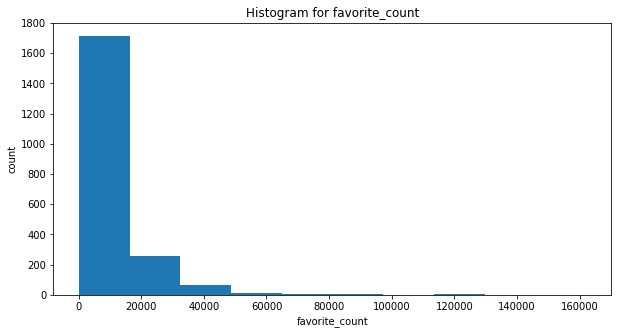

In [73]:
# create histogram for favorite_count
plt.figure(figsize = (10,5))
plt.hist(df_master.favorite_count)
plt.xlabel('favorite_count')
plt.ylabel('count')
plt.title('Histogram for favorite_count');

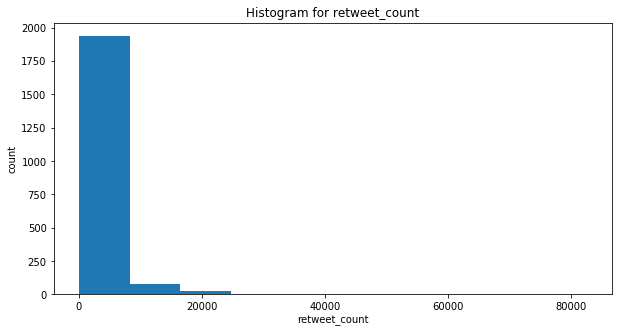

In [74]:
# create histogram for retweet_count
plt.figure(figsize = (10,5))
plt.hist(df_master.retweet_count)
plt.xlabel('retweet_count')
plt.ylabel('count')
plt.title('Histogram for retweet_count');

From the histograms, we see that both `retweet_count` and `favorite_count` are highly skewed to the right

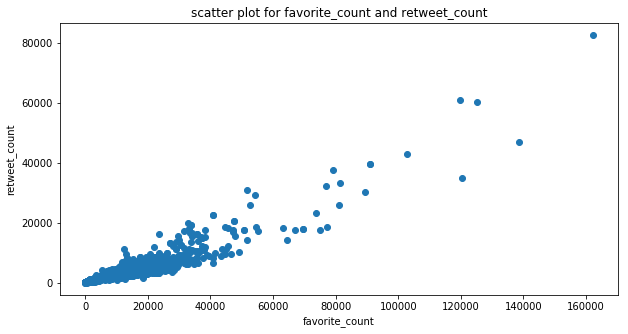

In [75]:
# scatter plot for the tweet_count and retweet_count
plt.figure(figsize = (10,5))
plt.scatter(df_master.favorite_count, df_master.retweet_count)
plt.title('scatter plot for favorite_count and retweet_count')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count');

As we can see from the saccter plot, there is a srtong positive relationship betweet the `favorite_count` and the `retweet_count`. One explanation could be that the more the tweet was liked the more it was retweeted

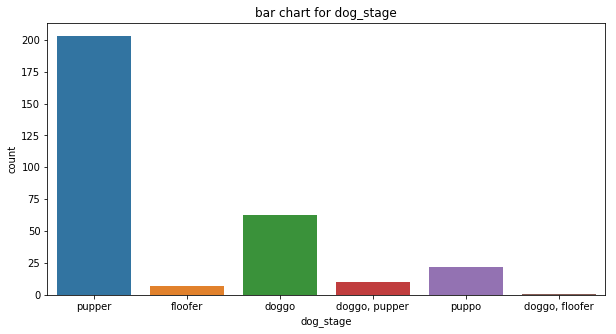

In [76]:
# bar plot for dog_stage
plt.figure(figsize = (10,5))
sns.countplot(df_master.query('dog_stage != "None"').dog_stage)
plt.title('bar chart for dog_stage');

From the above bar grapah, we notice the highest three dog stages are pupper, doggo, and puppo

In [77]:
# group the mean rating_numerator by p1_dog
rating_dog_or_not = df_master.groupby(df_master.p1_dog).rating_numerator.mean()
rating_dog_or_not

p1_dog
False    14.324952
True     11.484576
Name: rating_numerator, dtype: float64

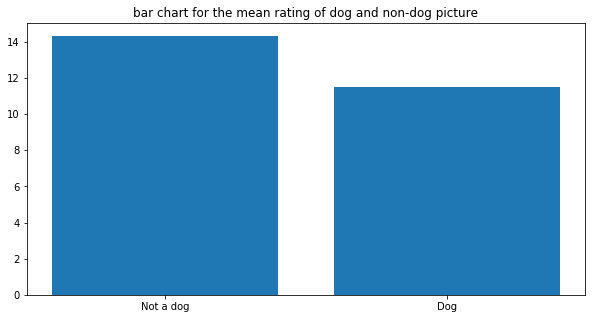

In [78]:
# bar chart for mean rating for dog and non-dog picture
plt.figure(figsize = (10,5))
plt.bar(['Not a dog', 'Dog'], rating_dog_or_not.values)
plt.title('bar chart for the mean rating of dog and non-dog picture');